In [3]:
import pandas as pd
import numpy as np
import pickle

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Concatenate

from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Flatten, LSTM, Embedding, Bidirectional, TimeDistributed, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Dropout
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import time
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, LSTM, Embedding, Bidirectional, TimeDistributed, Reshape
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential, load_model
from sklearn.metrics import mean_absolute_error, r2_score

In [4]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.list_physical_devices('GPU') 

[]

In [5]:
DF_MRI = pd.read_excel(open('./datasets/Our Dataset.xlsx', 'rb'),
              sheet_name='Data organized fluoro-monomer') 

In [6]:
DF_MRI

,VPA,QJ2,QJ3,FDH3,LX,ZDH1,T50
0,0.46,0.00,0.08,0.0,0.00,0.46,609
1,0.26,0.00,0.60,0.0,0.00,0.14,629
2,0.61,0.00,0.21,0.0,0.00,0.18,570
3,0.75,0.00,0.13,0.0,0.00,0.12,492
4,0.15,0.00,0.74,0.0,0.00,0.11,540
...,...,...,...,...,...,...,...
175,0.26,0.47,0.00,0.0,0.27,0.00,523
176,0.16,0.24,0.00,0.0,0.60,0.00,400
177,0.13,0.37,0.00,0.0,0.50,0.00,420
178,0.13,0.50,0.00,0.0,0.37,0.00,427


In [10]:
my_structure_dataset = [
    [0, 0, 1, 3, 1, 0, 0, 2, 2, 2, 0, 1],
    [0, 1, 0, 1, 1, 0, 0, 1, 2, 3, 0, 1],
    [0, 1, 0, 4, 1, 0, 0, 3, 2, 7, 0, 1],
    [1, 1, 0, 4, 1, 0, 0, 5, 4, 7, 0, 1],
    [0, 0, 1, 5, 1, 1, 0, 6, 3, 11, 1, 1],
    [0, 0, 0, 2, 1, 1, 1, 3, 2, 8, 0, 1]
]
X=pd.DataFrame(my_structure_dataset)
Flag = [i != 'X' for i in DF_MRI['T50']]

,VPA,QJ2,QJ3,FDH3,LX,ZDH1,T50
0,0.46,0.00,0.08,0.0,0.00,0.46,609
1,0.26,0.00,0.60,0.0,0.00,0.14,629
2,0.61,0.00,0.21,0.0,0.00,0.18,570
3,0.75,0.00,0.13,0.0,0.00,0.12,492
4,0.15,0.00,0.74,0.0,0.00,0.11,540
...,...,...,...,...,...,...,...
175,0.26,0.47,0.00,0.0,0.27,0.00,523
176,0.16,0.24,0.00,0.0,0.60,0.00,400
177,0.13,0.37,0.00,0.0,0.50,0.00,420
178,0.13,0.50,0.00,0.0,0.37,0.00,427


In [11]:
Mix_X_100Block = []
for i in range(len(DF_MRI[Flag])):
        random.seed(10)

        Random_position = []
        Random_position_all = []

        Rest = range(0, 100)
        for col in ['VPA', 'QJ2', 'QJ3', 'FDH3', 'LX', 'ZDH1']:
            
            X_random_position = random.sample(Rest, int(DF_MRI[Flag][col].iloc[i] * 100))
            Random_position.append(X_random_position)
            for p in X_random_position:
                Random_position_all.append(p)
            Rest = []
            for x in range(0, 100):
                if x not in Random_position_all:
                    Rest.append(x)
        
        Sequency_X = np.zeros((100, 12))
        for j in range(100):
            if j in Random_position[0]:
                Sequency_X[j] = X.iloc[0].values
            elif j in Random_position[1]:
                Sequency_X[j] = X.iloc[1].values
            elif j in Random_position[2]:
                Sequency_X[j] = X.iloc[2].values
            elif j in Random_position[3]:
                Sequency_X[j] = X.iloc[3].values
            elif j in Random_position[4]:
                Sequency_X[j] = X.iloc[4].values
            elif j in Random_position[5]:
                Sequency_X[j] = X.iloc[5].values
                
        Mix_X_100Block.append(Sequency_X)   

Mix_X_100Block = np.array(Mix_X_100Block)

In [12]:
Mix_X_100Block = np.array(Mix_X_100Block)
Mix_X_100Block.shape
Mix_X_100Block

array([[[ 0.,  0.,  1., ...,  2.,  0.,  1.],
        [ 0.,  0.,  1., ...,  2.,  0.,  1.],
        [ 0.,  0.,  1., ...,  2.,  0.,  1.],
        ...,
        [ 0.,  0.,  0., ...,  8.,  0.,  1.],
        [ 0.,  0.,  1., ...,  2.,  0.,  1.],
        [ 0.,  0.,  1., ...,  2.,  0.,  1.]],

       [[ 0.,  1.,  0., ...,  7.,  0.,  1.],
        [ 0.,  0.,  1., ...,  2.,  0.,  1.],
        [ 0.,  0.,  0., ...,  8.,  0.,  1.],
        ...,
        [ 0.,  1.,  0., ...,  7.,  0.,  1.],
        [ 0.,  0.,  1., ...,  2.,  0.,  1.],
        [ 0.,  0.,  1., ...,  2.,  0.,  1.]],

       [[ 0.,  0.,  1., ...,  2.,  0.,  1.],
        [ 0.,  0.,  1., ...,  2.,  0.,  1.],
        [ 0.,  0.,  1., ...,  2.,  0.,  1.],
        ...,
        [ 0.,  0.,  0., ...,  8.,  0.,  1.],
        [ 0.,  0.,  1., ...,  2.,  0.,  1.],
        [ 0.,  0.,  1., ...,  2.,  0.,  1.]],

       ...,

       [[ 0.,  1.,  0., ...,  3.,  0.,  1.],
        [ 0.,  0.,  1., ...,  2.,  0.,  1.],
        [ 0.,  0.,  1., ..., 11.,  1.,  1.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(Mix_X_100Block, DF_MRI[Flag]['T50'].astype(np.float64), test_size=0.2, random_state=11)

In [16]:
def getRNNmodel(LSTMunits):

    RNNmodel = Sequential()
    RNNmodel.add(Bidirectional(LSTM(LSTMunits, return_sequences=True), input_shape=(100,12)))
    RNNmodel.add(Bidirectional(LSTM(LSTMunits, return_sequences=True)))
    RNNmodel.add(TimeDistributed(Dense(int(LSTMunits/2), activation="relu")))
    RNNmodel.add(Reshape((int(LSTMunits/2*100),)))
    RNNmodel.add(Dense(1))

    return RNNmodel

X_train = np.array(X_train)
y_train = np.array(y_train)

LSTMunits = 40
RNNmodel = getRNNmodel(LSTMunits)
RNNmodel.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])
Model = RNNmodel.fit(X_train, y_train, validation_split=0.2, epochs=1000, \
                        batch_size=90)

Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Inconsistent ASTs detected. This is a bug. Cause: 
inconsistent values for field args: [<gast.gast.Name object at 0x00000162526EBC10>] and []Diff:
*** Original nodes

--- Reparsed nodes

***************

*** 30,68 ****

  | | | ]
  | | | value=Constant:
  | | | | value=None
  | | | | kind=None
  | | FunctionDef:
  | | | name=u"inner_factory"
  | | | args=arguments:
! | | | | args=[
  | | | | | Name:
  | | | | | | id=u"ag__"
  | | | | | | ctx=Param()
  | | | | | | annotation=None
  | | | | | | type_comment=None
  | | | | ]
- | | | | posonlyargs=[]
  | | | | vararg=None
  | | | | kwonlyargs=[]
  | | | | kw_defaults=[]
  | | | | kwarg=None
  | | | | defaults=[]
  | | | body=[
  | | | | FunctionDef:
  | | | | | name=u"tf__train_function"
  | | | | | args=arguments:
! | | | | | | args=[
  | | | | | | | Name:
  | |

3/3 [==============================] - 4s 507ms/step - loss: 304835.1875 - mean_squared_error: 304835.1875 - val_loss: 296957.4375 - val_mean_squared_error: 296957.4375
Epoch 2/1000
3/3 [==============================] - 0s 92ms/step - loss: 303015.0938 - mean_squared_error: 303015.0938 - val_loss: 294313.0938 - val_mean_squared_error: 294313.0938
Epoch 3/1000
3/3 [==============================] - 0s 92ms/step - loss: 299853.1875 - mean_squared_error: 299853.1875 - val_loss: 289989.1562 - val_mean_squared_error: 289989.1562
Epoch 4/1000
3/3 [==============================] - 0s 94ms/step - loss: 294928.5000 - mean_squared_error: 294928.5000 - val_loss: 283748.1875 - val_mean_squared_error: 283748.1875
Epoch 5/1000
3/3 [==============================] - 0s 90ms/step - loss: 287904.1562 - mean_squared_error: 287904.1562 - val_loss: 275411.2188 - val_mean_squared_error: 275411.2188
Epoch 6/1000
3/3 [==============================] - 0s 87ms/step - loss: 278847.5625 - mean_squared_error: 

3/3 [==============================] - 0s 99ms/step - loss: 15491.6084 - mean_squared_error: 15491.6084 - val_loss: 9280.5576 - val_mean_squared_error: 9280.5576
Epoch 48/1000
3/3 [==============================] - 0s 91ms/step - loss: 15492.7090 - mean_squared_error: 15492.7090 - val_loss: 9280.7842 - val_mean_squared_error: 9280.7842
Epoch 49/1000
3/3 [==============================] - 0s 94ms/step - loss: 15496.1318 - mean_squared_error: 15496.1318 - val_loss: 9281.1328 - val_mean_squared_error: 9281.1328
Epoch 50/1000
3/3 [==============================] - 0s 112ms/step - loss: 15494.4385 - mean_squared_error: 15494.4385 - val_loss: 9281.1074 - val_mean_squared_error: 9281.1074
Epoch 51/1000
3/3 [==============================] - 0s 127ms/step - loss: 15494.3408 - mean_squared_error: 15494.3398 - val_loss: 9280.8867 - val_mean_squared_error: 9280.8867
Epoch 52/1000
3/3 [==============================] - 0s 132ms/step - loss: 15494.6846 - mean_squared_error: 15494.6846 - val_loss: 9

3/3 [==============================] - 0s 130ms/step - loss: 15490.7266 - mean_squared_error: 15490.7275 - val_loss: 9278.1406 - val_mean_squared_error: 9278.1406
Epoch 140/1000
3/3 [==============================] - 0s 133ms/step - loss: 15503.3604 - mean_squared_error: 15503.3604 - val_loss: 9278.7783 - val_mean_squared_error: 9278.7783
Epoch 141/1000
3/3 [==============================] - 0s 132ms/step - loss: 15492.8604 - mean_squared_error: 15492.8604 - val_loss: 9278.7783 - val_mean_squared_error: 9278.7783
Epoch 142/1000
3/3 [==============================] - 0s 130ms/step - loss: 15494.2842 - mean_squared_error: 15494.2852 - val_loss: 9277.9180 - val_mean_squared_error: 9277.9180
Epoch 143/1000
3/3 [==============================] - 0s 140ms/step - loss: 15491.2021 - mean_squared_error: 15491.2021 - val_loss: 9277.8320 - val_mean_squared_error: 9277.8320
Epoch 144/1000
3/3 [==============================] - 0s 127ms/step - loss: 15491.9375 - mean_squared_error: 15491.9375 - val

3/3 [==============================] - 0s 138ms/step - loss: 15472.4160 - mean_squared_error: 15472.4160 - val_loss: 9259.6025 - val_mean_squared_error: 9259.6025
Epoch 232/1000
3/3 [==============================] - 0s 134ms/step - loss: 15488.8516 - mean_squared_error: 15488.8516 - val_loss: 9259.4102 - val_mean_squared_error: 9259.4102
Epoch 233/1000
3/3 [==============================] - 0s 120ms/step - loss: 15469.6367 - mean_squared_error: 15469.6367 - val_loss: 9254.5410 - val_mean_squared_error: 9254.5410
Epoch 234/1000
3/3 [==============================] - 0s 136ms/step - loss: 15465.3506 - mean_squared_error: 15465.3506 - val_loss: 9256.7080 - val_mean_squared_error: 9256.7080
Epoch 235/1000
3/3 [==============================] - 0s 134ms/step - loss: 15483.3721 - mean_squared_error: 15483.3721 - val_loss: 9248.3193 - val_mean_squared_error: 9248.3193
Epoch 236/1000
3/3 [==============================] - 0s 137ms/step - loss: 15464.1904 - mean_squared_error: 15464.1904 - val

3/3 [==============================] - 0s 134ms/step - loss: 14457.3564 - mean_squared_error: 14457.3564 - val_loss: 8980.0283 - val_mean_squared_error: 8980.0283
Epoch 324/1000
3/3 [==============================] - 0s 140ms/step - loss: 14603.1885 - mean_squared_error: 14603.1885 - val_loss: 8969.3623 - val_mean_squared_error: 8969.3623
Epoch 325/1000
3/3 [==============================] - 0s 133ms/step - loss: 14582.5889 - mean_squared_error: 14582.5879 - val_loss: 8935.4150 - val_mean_squared_error: 8935.4150
Epoch 326/1000
3/3 [==============================] - 0s 136ms/step - loss: 14588.7178 - mean_squared_error: 14588.7178 - val_loss: 8892.9375 - val_mean_squared_error: 8892.9375
Epoch 327/1000
3/3 [==============================] - 0s 131ms/step - loss: 14471.5059 - mean_squared_error: 14471.5049 - val_loss: 9300.6494 - val_mean_squared_error: 9300.6494
Epoch 328/1000
3/3 [==============================] - 0s 141ms/step - loss: 14424.8203 - mean_squared_error: 14424.8203 - val

3/3 [==============================] - 0s 173ms/step - loss: 12937.2441 - mean_squared_error: 12937.2441 - val_loss: 8868.9775 - val_mean_squared_error: 8868.9775
Epoch 416/1000
3/3 [==============================] - 0s 158ms/step - loss: 12871.7461 - mean_squared_error: 12871.7461 - val_loss: 10249.1104 - val_mean_squared_error: 10249.1104
Epoch 417/1000
3/3 [==============================] - 0s 145ms/step - loss: 13074.5762 - mean_squared_error: 13074.5762 - val_loss: 8803.5928 - val_mean_squared_error: 8803.5928
Epoch 418/1000
3/3 [==============================] - 0s 158ms/step - loss: 12950.2451 - mean_squared_error: 12950.2451 - val_loss: 9004.2031 - val_mean_squared_error: 9004.2031
Epoch 419/1000
3/3 [==============================] - 0s 151ms/step - loss: 12764.7158 - mean_squared_error: 12764.7158 - val_loss: 10063.6406 - val_mean_squared_error: 10063.6406
Epoch 420/1000
3/3 [==============================] - 0s 154ms/step - loss: 12663.1143 - mean_squared_error: 12663.1143 -

Epoch 461/1000
3/3 [==============================] - 0s 133ms/step - loss: 12137.5762 - mean_squared_error: 12137.5762 - val_loss: 9560.9785 - val_mean_squared_error: 9560.9785
Epoch 462/1000
3/3 [==============================] - 0s 129ms/step - loss: 13220.4053 - mean_squared_error: 13220.4062 - val_loss: 8968.8945 - val_mean_squared_error: 8968.8945
Epoch 463/1000
3/3 [==============================] - 0s 130ms/step - loss: 13293.4111 - mean_squared_error: 13293.4111 - val_loss: 9508.2988 - val_mean_squared_error: 9508.2988
Epoch 464/1000
3/3 [==============================] - 0s 128ms/step - loss: 13545.4199 - mean_squared_error: 13545.4199 - val_loss: 8855.9424 - val_mean_squared_error: 8855.9424
Epoch 465/1000
3/3 [==============================] - 0s 124ms/step - loss: 13123.1143 - mean_squared_error: 13123.1143 - val_loss: 8509.5947 - val_mean_squared_error: 8509.5947
Epoch 466/1000
3/3 [==============================] - 0s 123ms/step - loss: 13229.3535 - mean_squared_error: 1

Epoch 507/1000
3/3 [==============================] - 0s 154ms/step - loss: 12460.9863 - mean_squared_error: 12460.9863 - val_loss: 9493.3262 - val_mean_squared_error: 9493.3262
Epoch 508/1000
3/3 [==============================] - 0s 143ms/step - loss: 12649.1484 - mean_squared_error: 12649.1484 - val_loss: 10008.4824 - val_mean_squared_error: 10008.4824
Epoch 509/1000
3/3 [==============================] - 0s 133ms/step - loss: 13654.0420 - mean_squared_error: 13654.0420 - val_loss: 9837.1465 - val_mean_squared_error: 9837.1465
Epoch 510/1000
3/3 [==============================] - 0s 137ms/step - loss: 13454.8740 - mean_squared_error: 13454.8740 - val_loss: 12146.7686 - val_mean_squared_error: 12146.7686
Epoch 511/1000
3/3 [==============================] - 0s 147ms/step - loss: 13401.1455 - mean_squared_error: 13401.1455 - val_loss: 9926.9336 - val_mean_squared_error: 9926.9336
Epoch 512/1000
3/3 [==============================] - 0s 139ms/step - loss: 12876.6104 - mean_squared_erro

Epoch 553/1000
3/3 [==============================] - 0s 155ms/step - loss: 11708.0400 - mean_squared_error: 11708.0400 - val_loss: 10414.6875 - val_mean_squared_error: 10414.6875
Epoch 554/1000
3/3 [==============================] - 0s 164ms/step - loss: 11749.8799 - mean_squared_error: 11749.8799 - val_loss: 10587.9180 - val_mean_squared_error: 10587.9180
Epoch 555/1000
3/3 [==============================] - 0s 131ms/step - loss: 11872.2217 - mean_squared_error: 11872.2217 - val_loss: 10371.7812 - val_mean_squared_error: 10371.7812
Epoch 556/1000
3/3 [==============================] - 0s 141ms/step - loss: 11953.0996 - mean_squared_error: 11953.0996 - val_loss: 9790.1885 - val_mean_squared_error: 9790.1885
Epoch 557/1000
3/3 [==============================] - 0s 146ms/step - loss: 11820.8965 - mean_squared_error: 11820.8965 - val_loss: 9574.7627 - val_mean_squared_error: 9574.7627
Epoch 558/1000
3/3 [==============================] - 0s 145ms/step - loss: 11726.9609 - mean_squared_er

Epoch 599/1000
3/3 [==============================] - 0s 154ms/step - loss: 12322.1299 - mean_squared_error: 12322.1299 - val_loss: 10431.4561 - val_mean_squared_error: 10431.4561
Epoch 600/1000
3/3 [==============================] - 0s 129ms/step - loss: 11980.0508 - mean_squared_error: 11980.0508 - val_loss: 10361.8965 - val_mean_squared_error: 10361.8965
Epoch 601/1000
3/3 [==============================] - 0s 141ms/step - loss: 12092.0693 - mean_squared_error: 12092.0693 - val_loss: 10513.7227 - val_mean_squared_error: 10513.7227
Epoch 602/1000
3/3 [==============================] - 0s 133ms/step - loss: 11810.1973 - mean_squared_error: 11810.1973 - val_loss: 10099.3027 - val_mean_squared_error: 10099.3027
Epoch 603/1000
3/3 [==============================] - 0s 129ms/step - loss: 11627.1611 - mean_squared_error: 11627.1611 - val_loss: 9824.2412 - val_mean_squared_error: 9824.2412
Epoch 604/1000
3/3 [==============================] - 0s 143ms/step - loss: 11977.0020 - mean_squared_

Epoch 645/1000
3/3 [==============================] - 0s 145ms/step - loss: 12556.9004 - mean_squared_error: 12556.9004 - val_loss: 9268.2070 - val_mean_squared_error: 9268.2070
Epoch 646/1000
3/3 [==============================] - 0s 157ms/step - loss: 12516.5645 - mean_squared_error: 12516.5645 - val_loss: 9370.9736 - val_mean_squared_error: 9370.9736
Epoch 647/1000
3/3 [==============================] - 0s 145ms/step - loss: 12318.5586 - mean_squared_error: 12318.5586 - val_loss: 9557.8975 - val_mean_squared_error: 9557.8975
Epoch 648/1000
3/3 [==============================] - 0s 123ms/step - loss: 12599.6758 - mean_squared_error: 12599.6758 - val_loss: 9562.4189 - val_mean_squared_error: 9562.4189
Epoch 649/1000
3/3 [==============================] - 0s 139ms/step - loss: 12257.8467 - mean_squared_error: 12257.8467 - val_loss: 9424.4961 - val_mean_squared_error: 9424.4961
Epoch 650/1000
3/3 [==============================] - 0s 136ms/step - loss: 12094.5420 - mean_squared_error: 1

Epoch 691/1000
3/3 [==============================] - 0s 140ms/step - loss: 11819.6152 - mean_squared_error: 11819.6152 - val_loss: 10248.8633 - val_mean_squared_error: 10248.8633
Epoch 692/1000
3/3 [==============================] - 0s 137ms/step - loss: 11615.6143 - mean_squared_error: 11615.6143 - val_loss: 9785.8320 - val_mean_squared_error: 9785.8320
Epoch 693/1000
3/3 [==============================] - 0s 140ms/step - loss: 11713.1523 - mean_squared_error: 11713.1523 - val_loss: 9211.1123 - val_mean_squared_error: 9211.1123
Epoch 694/1000
3/3 [==============================] - 0s 136ms/step - loss: 11515.3438 - mean_squared_error: 11515.3438 - val_loss: 9346.3525 - val_mean_squared_error: 9346.3525
Epoch 695/1000
3/3 [==============================] - 0s 137ms/step - loss: 12059.8408 - mean_squared_error: 12059.8408 - val_loss: 8914.7275 - val_mean_squared_error: 8914.7275
Epoch 696/1000
3/3 [==============================] - 0s 132ms/step - loss: 11984.3965 - mean_squared_error:

Epoch 737/1000
3/3 [==============================] - 0s 142ms/step - loss: 10710.7715 - mean_squared_error: 10710.7715 - val_loss: 9859.4316 - val_mean_squared_error: 9859.4316
Epoch 738/1000
3/3 [==============================] - 0s 156ms/step - loss: 10724.5400 - mean_squared_error: 10724.5400 - val_loss: 10191.6611 - val_mean_squared_error: 10191.6611
Epoch 739/1000
3/3 [==============================] - 0s 131ms/step - loss: 10733.7480 - mean_squared_error: 10733.7480 - val_loss: 10570.4434 - val_mean_squared_error: 10570.4434
Epoch 740/1000
3/3 [==============================] - 0s 130ms/step - loss: 10594.8799 - mean_squared_error: 10594.8799 - val_loss: 10413.8232 - val_mean_squared_error: 10413.8232
Epoch 741/1000
3/3 [==============================] - 0s 136ms/step - loss: 10562.9395 - mean_squared_error: 10562.9395 - val_loss: 10257.8223 - val_mean_squared_error: 10257.8223
Epoch 742/1000
3/3 [==============================] - 0s 148ms/step - loss: 10172.5107 - mean_squared_

Epoch 783/1000
3/3 [==============================] - 0s 141ms/step - loss: 9849.5127 - mean_squared_error: 9849.5117 - val_loss: 10704.8613 - val_mean_squared_error: 10704.8613
Epoch 784/1000
3/3 [==============================] - 0s 130ms/step - loss: 9620.4619 - mean_squared_error: 9620.4619 - val_loss: 10911.1143 - val_mean_squared_error: 10911.1143
Epoch 785/1000
3/3 [==============================] - 0s 128ms/step - loss: 9475.0908 - mean_squared_error: 9475.0908 - val_loss: 11219.7256 - val_mean_squared_error: 11219.7256
Epoch 786/1000
3/3 [==============================] - 0s 136ms/step - loss: 9313.9795 - mean_squared_error: 9313.9795 - val_loss: 11123.8545 - val_mean_squared_error: 11123.8545
Epoch 787/1000
3/3 [==============================] - 0s 159ms/step - loss: 9102.8408 - mean_squared_error: 9102.8408 - val_loss: 10921.7744 - val_mean_squared_error: 10921.7744
Epoch 788/1000
3/3 [==============================] - 0s 131ms/step - loss: 9302.9531 - mean_squared_error: 93

3/3 [==============================] - 0s 142ms/step - loss: 7309.6982 - mean_squared_error: 7309.6982 - val_loss: 10574.3906 - val_mean_squared_error: 10574.3906
Epoch 876/1000
3/3 [==============================] - 0s 143ms/step - loss: 7115.2520 - mean_squared_error: 7115.2520 - val_loss: 10883.8633 - val_mean_squared_error: 10883.8633
Epoch 877/1000
3/3 [==============================] - 0s 142ms/step - loss: 7024.4570 - mean_squared_error: 7024.4570 - val_loss: 10750.4277 - val_mean_squared_error: 10750.4277
Epoch 878/1000
3/3 [==============================] - 0s 142ms/step - loss: 6911.3882 - mean_squared_error: 6911.3882 - val_loss: 10478.9854 - val_mean_squared_error: 10478.9854
Epoch 879/1000
3/3 [==============================] - 0s 142ms/step - loss: 7282.9351 - mean_squared_error: 7282.9351 - val_loss: 10638.6328 - val_mean_squared_error: 10638.6328
Epoch 880/1000
3/3 [==============================] - 0s 141ms/step - loss: 7494.1362 - mean_squared_error: 7494.1367 - val_l

3/3 [==============================] - 0s 141ms/step - loss: 6973.8467 - mean_squared_error: 6973.8467 - val_loss: 9599.9932 - val_mean_squared_error: 9599.9932
Epoch 968/1000
3/3 [==============================] - 0s 141ms/step - loss: 6795.6299 - mean_squared_error: 6795.6309 - val_loss: 9407.0850 - val_mean_squared_error: 9407.0850
Epoch 969/1000
3/3 [==============================] - 0s 144ms/step - loss: 6723.8823 - mean_squared_error: 6723.8823 - val_loss: 8914.1973 - val_mean_squared_error: 8914.1973
Epoch 970/1000
3/3 [==============================] - 0s 144ms/step - loss: 6592.8125 - mean_squared_error: 6592.8125 - val_loss: 9887.5283 - val_mean_squared_error: 9887.5283
Epoch 971/1000
3/3 [==============================] - 0s 153ms/step - loss: 6584.5518 - mean_squared_error: 6584.5518 - val_loss: 10217.6152 - val_mean_squared_error: 10217.6152
Epoch 972/1000
3/3 [==============================] - 0s 133ms/step - loss: 6515.6255 - mean_squared_error: 6515.6255 - val_loss: 997

In [17]:
with open('RNN_Loss.pickle', 'wb') as handle:
    pickle.dump(Model.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
Model.history = pickle.load(open("RNN_Loss.pickle","rb"))

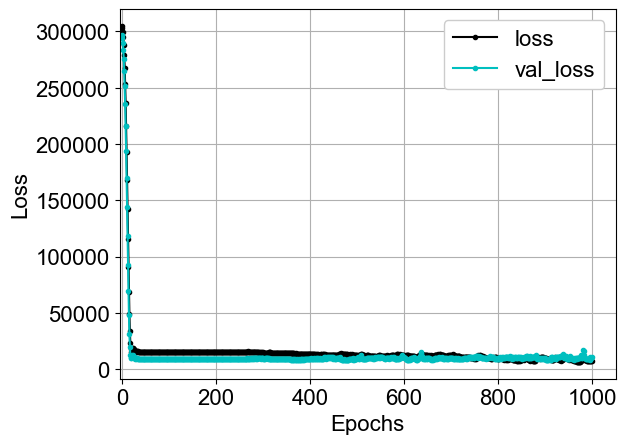

In [19]:
loss = Model.history['loss']
val_loss = Model.history['val_loss']
epochs = len(loss)
plt.xlim((-5, 1050))
plt.plot(range(epochs), loss, color = 'k', marker = '.', label = 'loss')
plt.plot(range(epochs), val_loss, color = 'c', marker = '.', label = 'val_loss')
plt.xticks(fontname="Arial", fontsize=16, fontweight='normal')
plt.yticks(fontname="Arial", fontsize=16, fontweight='normal')
plt.legend(loc = 'best', framealpha=1, prop={'size': 16, 'family':"Arial"})

plt.grid()
plt.xlabel('Epochs',fontname="Arial", fontsize=16)
plt.ylabel('Loss',fontname="Arial", fontsize=16)
plt.savefig("RNN_Loss.png", dpi=600, bbox_inches='tight')
plt.show()

In [20]:
filepath = 'MRI_RNN.model'
save_model(RNNmodel, filepath, save_format='h5')
RNNmodel = load_model('MRI_RNN.model')

In [21]:
y_pred_train = RNNmodel.predict((X_train))
print("Train set R^2: %.2f" % r2_score(y_train, y_pred_train))
print("Train MAE score: %.2f" % mean_absolute_error(y_train, y_pred_train))
print("Train RMSE score: %.2f" % np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = RNNmodel.predict((X_test))
print("Test set R^2: %.2f" % r2_score(y_test, y_pred_test))
print("Test MAE score: %.2f" % mean_absolute_error(y_test, y_pred_test))
print("Test RMSE score: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Inconsistent ASTs detected. This is a bug. Cause: 
inconsistent values for field args: [<gast.gast.Name object at 0x00000162644AE640>] and []Diff:
*** Original nodes

--- Reparsed nodes

***************

*** 30,68 ****

  | | | ]
  | | | value=Constant:
  | | | | value=None
  | | | | kind=None
  | | FunctionDef:
  | | | name=u"inner_factory"
  | | | args=arguments:
! | | | | args=[
  | | | | | Name:
  | | | | | | id=u"ag__"
  | | | | | | ctx=Param()
  | | | | | | annotation=None
  | | | | | | type_comment=None
  | | | | ]
- | | | | posonlyargs=[]
  | | | | vararg=None
  | | | | kwonlyargs=[]
  | | | | kw_defaults=[]
  | | | | kwarg=None
  | | | | defaults=[]
  | | | body=[
  | | | | FunctionDef:
  | | | | | name=u"tf__predict_function"
  | | | | | args=arguments:
! | | | | | | args=[
  | | | | | | | Name:
  | | | | | | | 

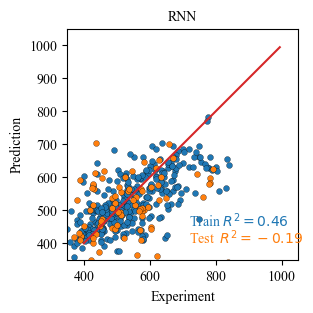

In [22]:
plt.figure(figsize=(3,3))

ax=plt.subplot(1, 1, 1)
plt.scatter(y_train, y_pred_train, c='#1f77b4', marker='o', s = 18, edgecolors='k', linewidths = 0.2)
plt.scatter(y_test, y_pred_test, c='#ff7f0e', marker='o', s = 18, edgecolors='k', linewidths = 0.2) 

plt.xlabel("Experiment",fontname="Times New Roman", fontsize=10)
plt.ylabel("Prediction",fontname="Times New Roman", fontsize=10)
x0, x1 = min(y_train), max(y_train)
length = 600
x_start, x_end = 400, 1000
plt.xlim([350, 1050])
plt.ylim([350, 1050])
# ax.set_xticks([-200,-100,0,100,200,300,400,500])
# ax.set_yticks([-200,-100,0,100,200,300,400,500])
plt.xticks(fontname="Times New Roman", fontsize=10, fontweight='normal')
plt.yticks(fontname="Times New Roman", fontsize=10, fontweight='normal')
plt.gca().set_aspect("equal", adjustable="box")
# the unit line
plt.plot(np.arange(x_start, x_end, 0.01*length),
np.arange(x_start, x_end, 0.01*length), '#d62728')
plt.text(720, 450, "Train $R^2={:.2f}$".format(round(r2_score(y_train, y_pred_train),2)),{'color':'#1f77b4'}, fontname="Times New Roman", fontsize=10, fontweight='normal')
plt.text(720, 400, "Test  $R^2 ={:.2f}$".format(r2_score(y_test, y_pred_test)),{'color':'#ff7f0e'}, fontname="Times New Roman", fontsize=10, fontweight='normal')
#plt.text(80, 500, "Dataset_1")
plt.title('RNN',fontname="Times New Roman", fontsize=10)
plt.savefig("Polyinfo_RNN.png", dpi=1200, bbox_inches='tight') 